### What is Multiple Linear Regression?
Multiple linear regression is a statistical technique used to model the relationship between one dependent variable (also called the response variable) and two or more independent variables (also called predictor variables). The goal is to fit a linear equation that can be used to predict the dependent variable from the independent variables

### Example Scenario
Suppose we have data about the prices of houses and we want to predict the price of a house based on its size (in square feet), number of bedrooms, and age (in years)

In [2]:
data = {
    'Size':[1500, 1600, 1700, 1800, 1900],
    'Bedrooms':[3, 3, 3, 4, 4],
    'Age':[10, 5, 15, 20, 10],
    'Price':[300000, 350000, 280000, 500000, 450000]
}

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# creating a dataframe
df = pd.DataFrame(data)
df

,Size,Bedrooms,Age,Price
0,1500,3,10,300000
1,1600,3,5,350000
2,1700,3,15,280000
3,1800,4,20,500000
4,1900,4,10,450000


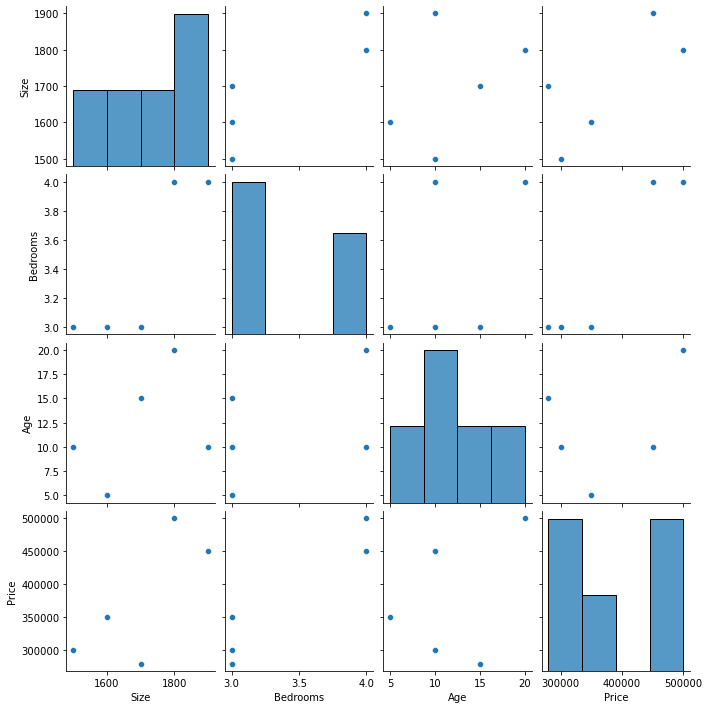

In [7]:
# visualizing the relationships
sns.pairplot(df)
plt.show()

In [9]:
import statsmodels.api as sm
# defining the dependent variable and the independent variable
y = df['Price']
x = df[['Size', 'Bedrooms', 'Age']]

# adding a constant to the model
x = sm.add_constant(x)

# fitting the model
model = sm.OLS(y, x).fit()

# displaying the summary of the model
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.919
Model:                            OLS   Adj. R-squared:                  0.678
Method:                 Least Squares   F-statistic:                     3.807
Date:                Tue, 06 Aug 2024   Prob (F-statistic):              0.356
Time:                        14:55:39   Log-Likelihood:                -57.575
No. Observations:                   5   AIC:                             123.2
Df Residuals:                       1   BIC:                             121.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -3.7e+04   3.39e+05     -0.109      0.9

c:\Users\user\anaconda3\envs\learn-env\lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


### Interpreting the Results
The summary provides various statistics about the model. Key components include:

1. Coefficients: These values tell us how much the dependent variable (Price) is expected to increase (or decrease) when the independent variable increases by one unit, holding all other variables constant.
2. P-values: These help us determine the statistical significance of each coefficient. A small p-value (typically < 0.05) indicates strong evidence against the null hypothesis, suggesting the coefficient is significantly different from zero.
3. R-squared: This statistic indicates the proportion of the variance in the dependent variable that is predictable from the independent variables. A higher R-squared value indicates a better fit for the model.

### Key points from the summary:

1. The R-squared value is 0.919, indicating that 92% of the variance in house prices can be explained by the model.
2. The coefficients for Size, Bedrooms, and Age tell us the expected change in price for a one-unit increase in these variables.

In [20]:
# new data for prediction
new_data = {
    'Size':[2000],
    'Bedrooms':[4],
    'Age':[5]
}
df1 = pd.DataFrame(new_data)

# adding a constant to the new dataframe
df1 = sm.add_constant(df1, has_constant='add')

df1

,const,Size,Bedrooms,Age
0,1.0,2000,4,5


In [21]:
# making predictions
predicted_price = model.predict(df1)
predicted_price

0    458000.0
dtype: float64